In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import  matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_csv('/kaggle/input/mental-health-detection-dataset/Deepression.csv')

/kaggle/input/mental-health-detection-dataset/Deepression.csv


In [2]:
df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [3]:
df.tail()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
808,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

In [5]:
df.shape

(813, 16)

In [6]:
df.isnull().sum()

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [7]:
df['Sleep'].unique()

array([ 1.,  2.,  5.,  6.,  3.,  4., nan])

In [8]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

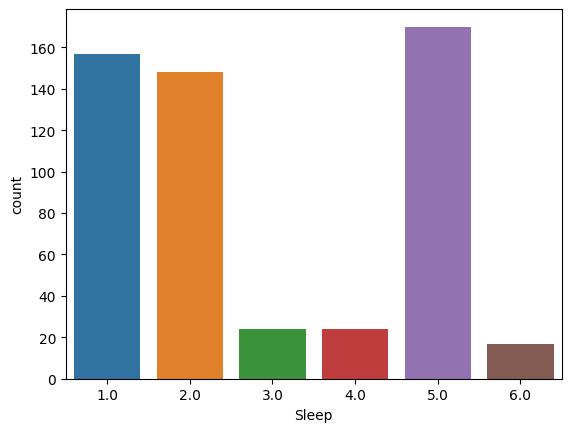

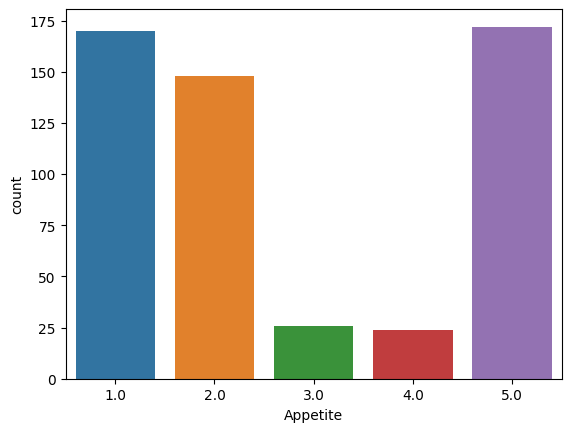

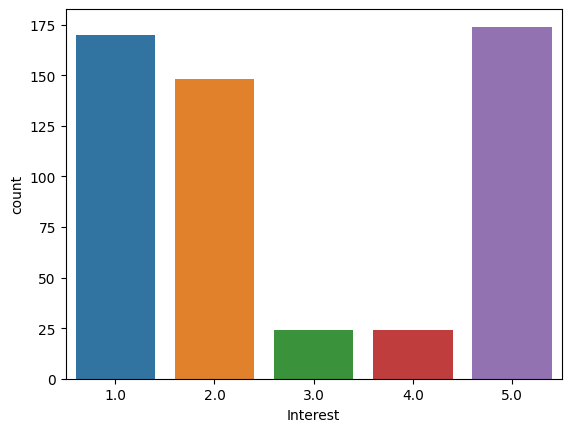

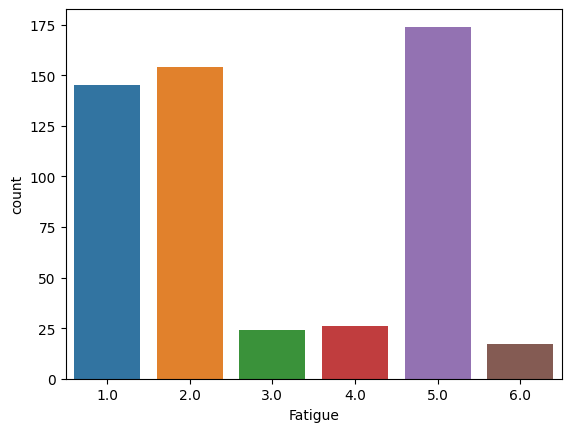

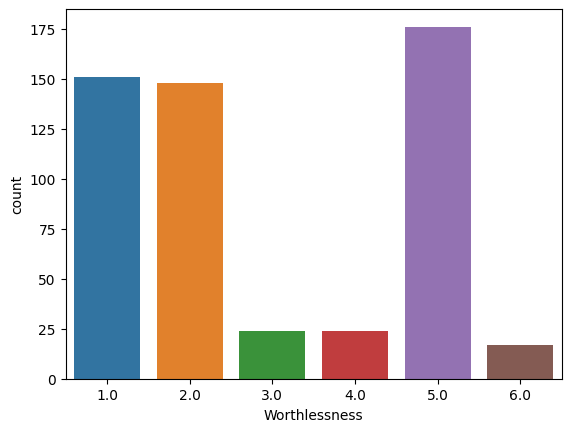

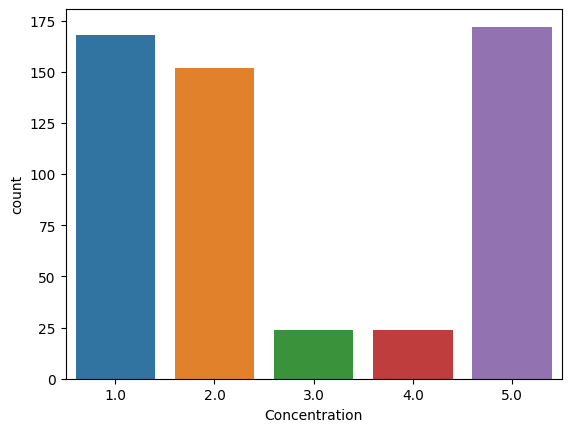

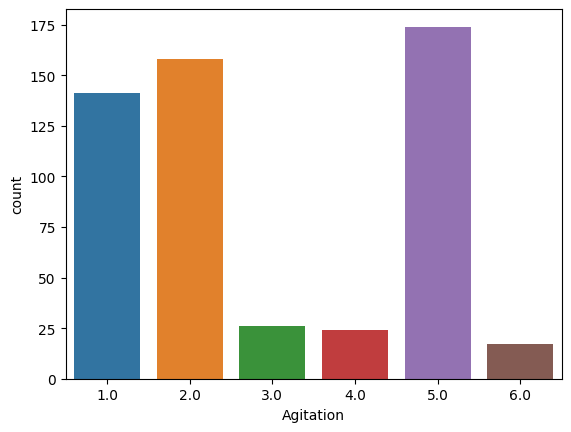

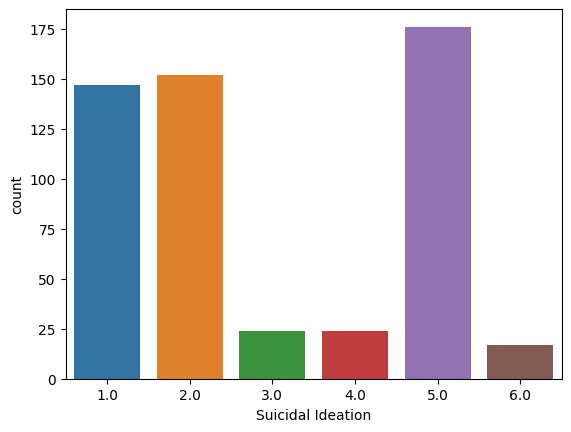

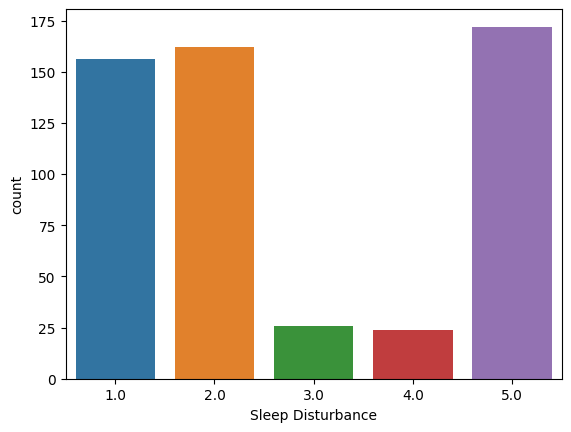

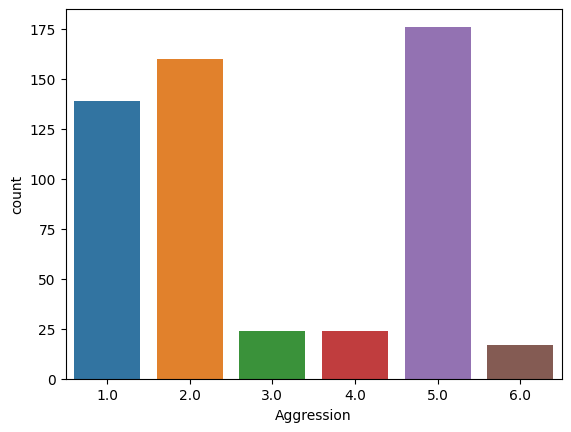

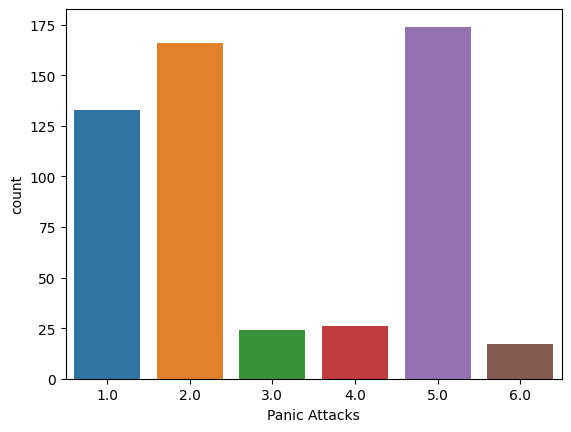

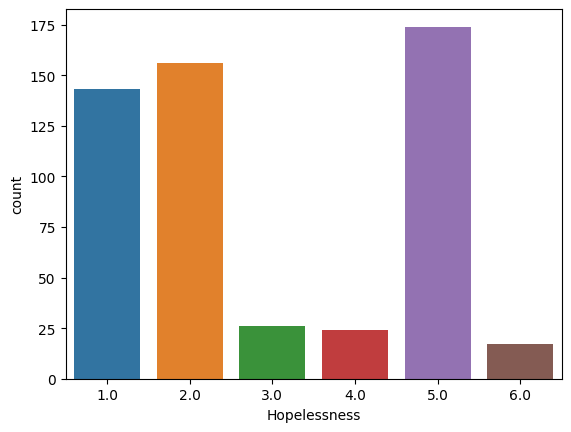

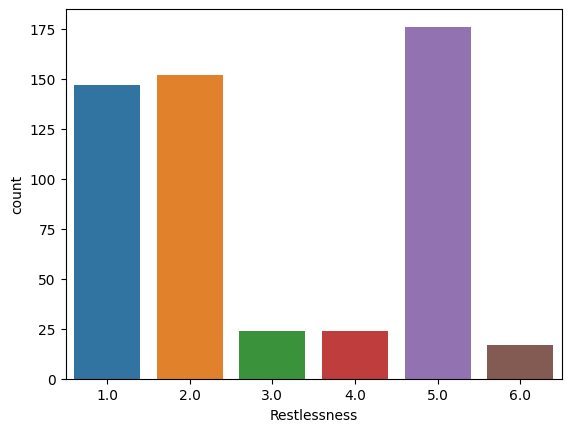

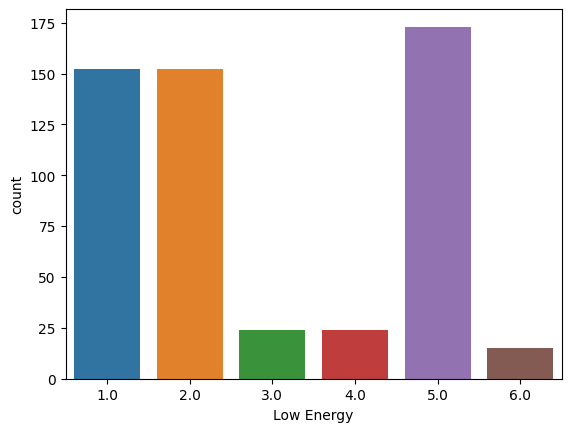

In [9]:
# countplot for all columns
for loop in df.columns[1:-1]:
    sns.countplot(x=df[f'{loop}'])
    plt.show()

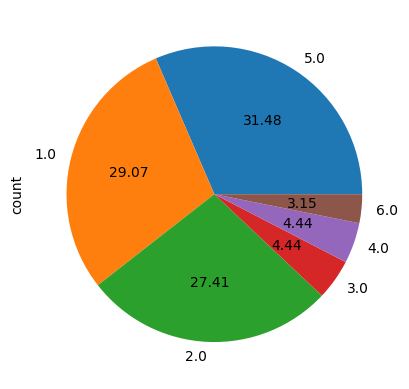

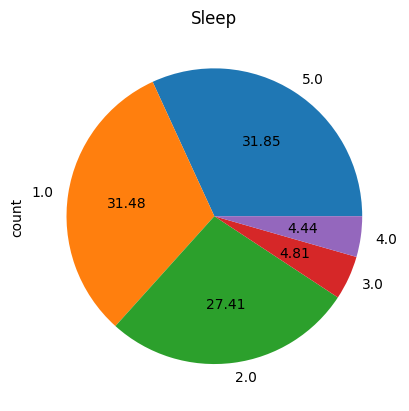

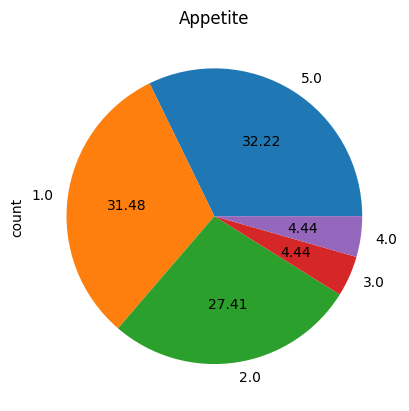

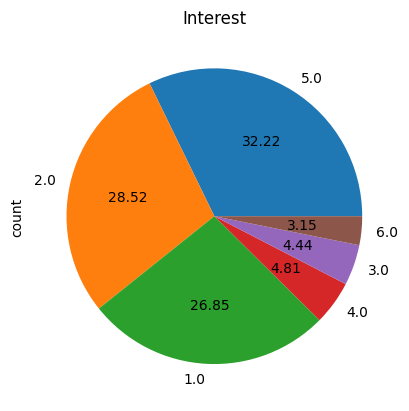

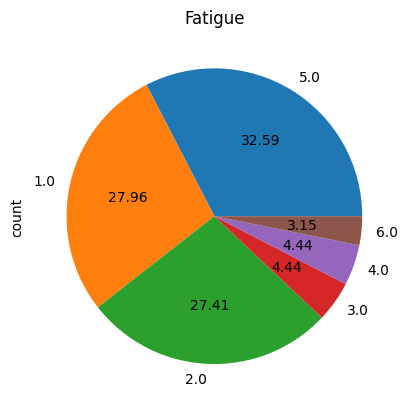

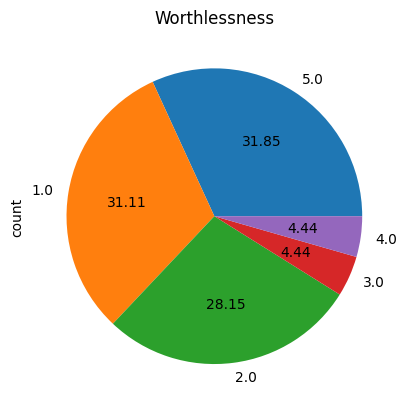

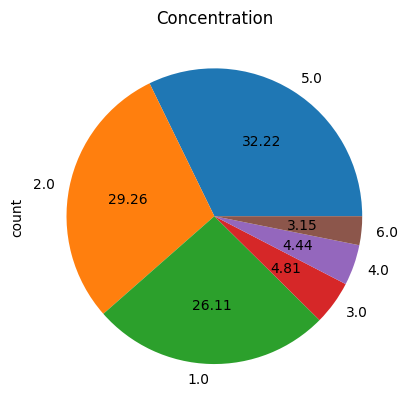

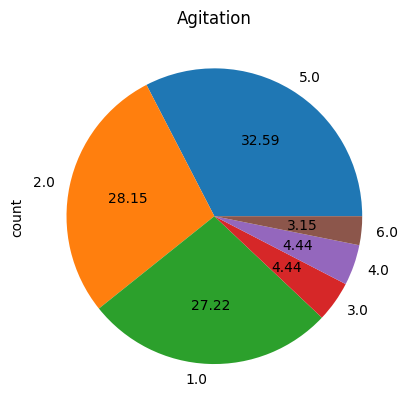

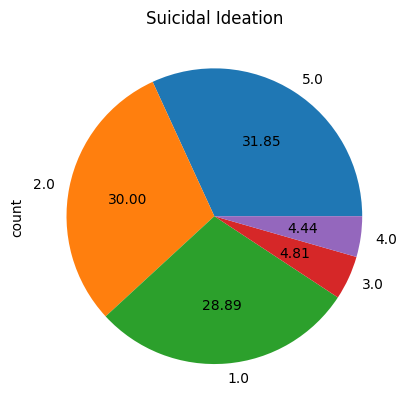

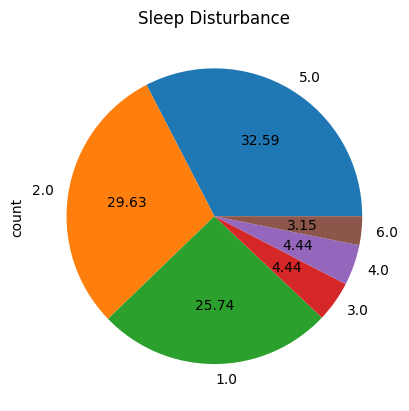

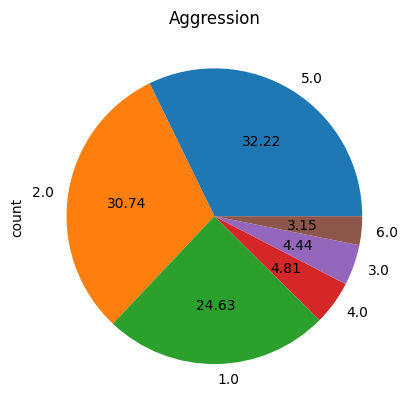

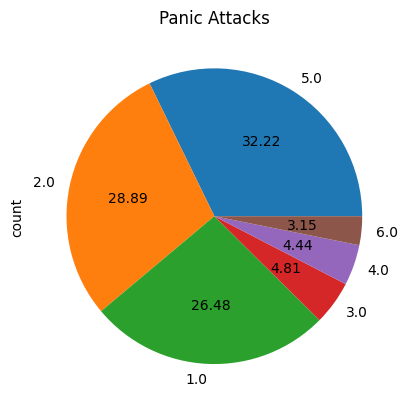

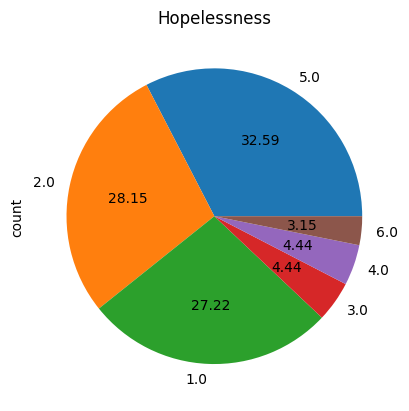

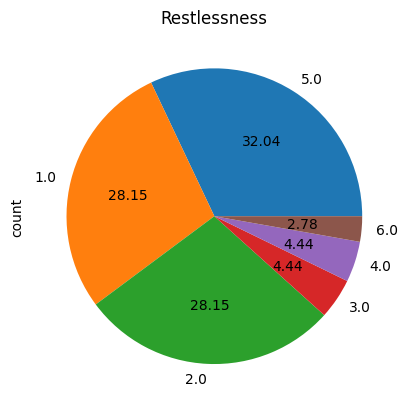

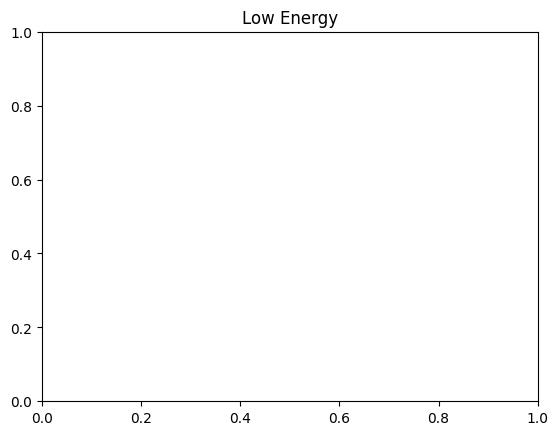

In [10]:
# countplot for all columns
for loop in df.columns[1:-1]:    
    df[f'{loop}'].value_counts().plot(kind='pie',autopct='%.2f')
    plt.show()
    plt.title(f'{loop}')

In [11]:
df['Depression State'].value_counts()

Depression State
No depression       157
Mild                117
Moderate            109
Severe              108
\tNo depression      15
\tModerate           11
\tMild               11
\tSevere             10
2\tNo depression      1
5\tNo depression      1
Name: count, dtype: int64

In [12]:
def depression_state_formatting(state):
    if state =='\tNo depression':
        return 'No depression'
    if state =='\tModerate':
        return 'Moderate'
    if state =='\tMild':
        return 'Mild'
    if state =='\tSevere':
        return 'Severe'
    if state =='2\tNo depression':
        return 'No depression'
    if state =='5\tNo depression':
        return 'No depression'
    

In [13]:
df['Depression State'] = df['Depression State'].apply(depression_state_formatting)

In [14]:
df['Depression State'].value_counts()

Depression State
No depression    17
Moderate         11
Mild             11
Severe           10
Name: count, dtype: int64

<Axes: xlabel='Depression State'>

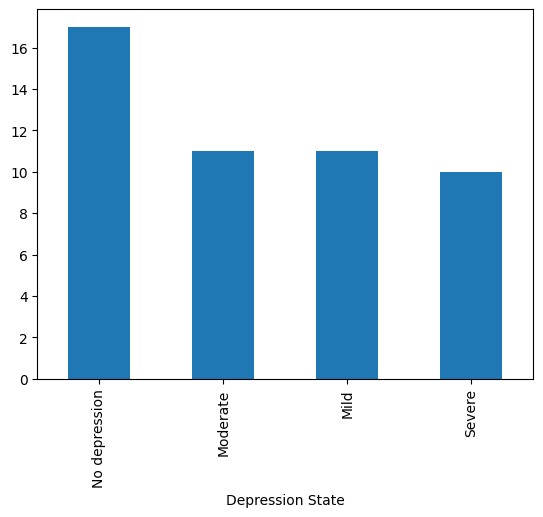

In [15]:
df['Depression State'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

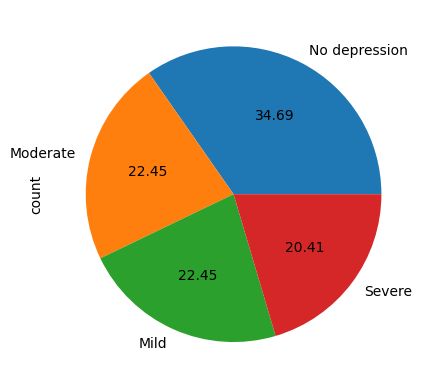

In [16]:
df['Depression State'].value_counts().plot(kind='pie',autopct='%.2f')

In [17]:
df.columns

Index(['Number ', 'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
       'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance',
       'Aggression', 'Panic Attacks', 'Hopelessness', 'Restlessness',
       'Low Energy', 'Depression State'],
      dtype='object')

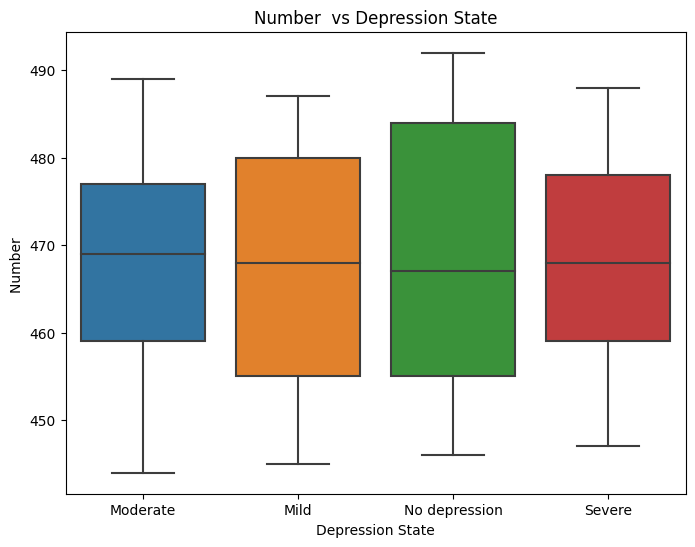

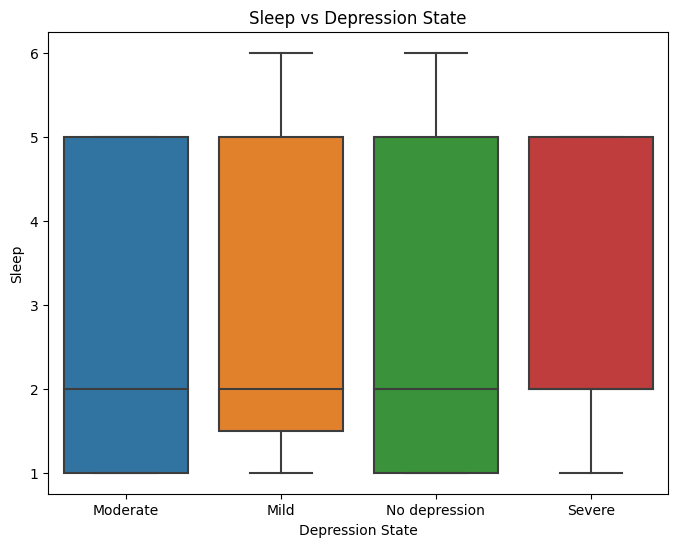

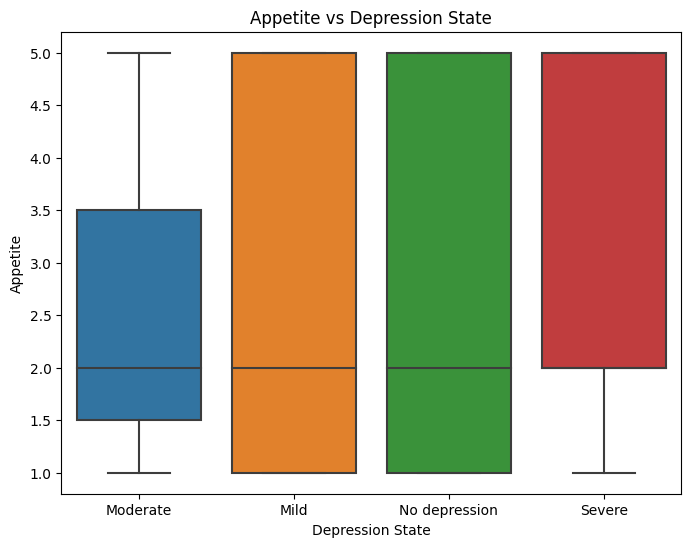

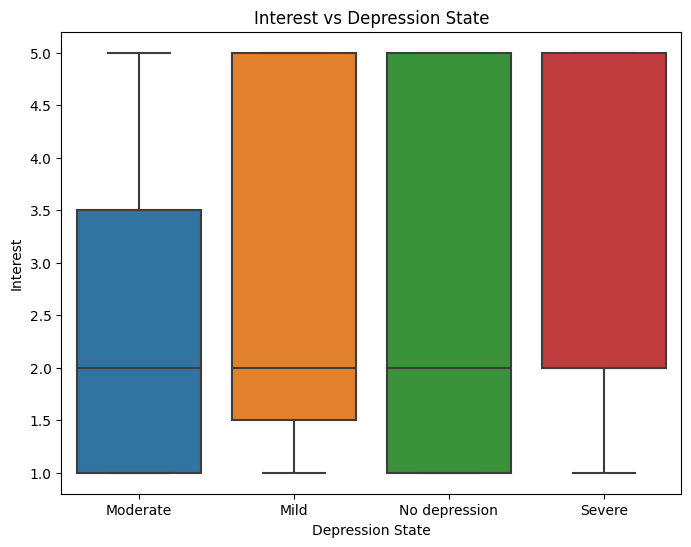

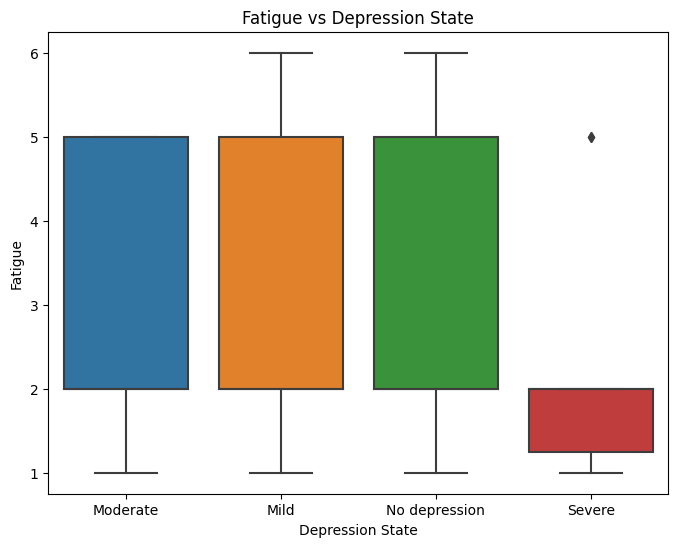

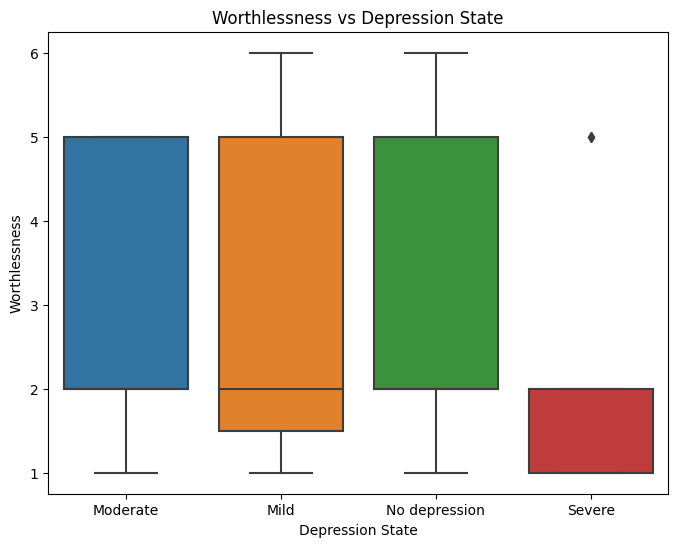

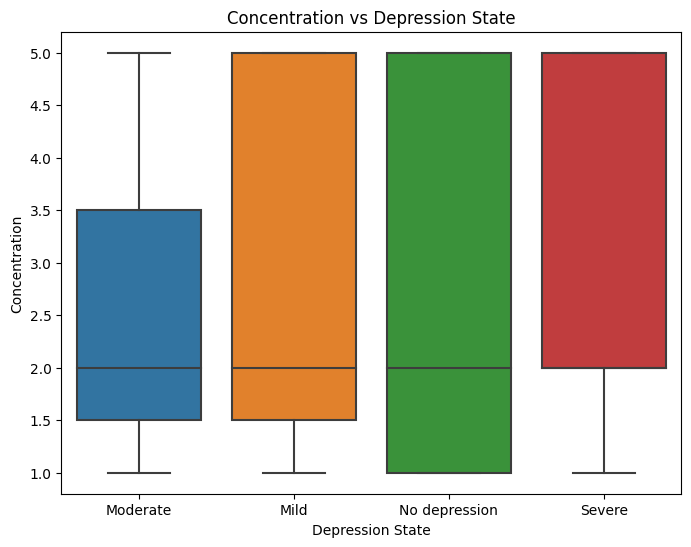

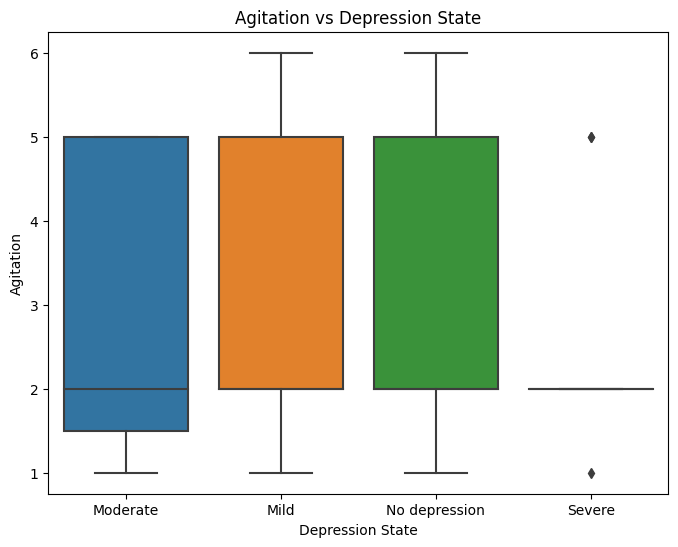

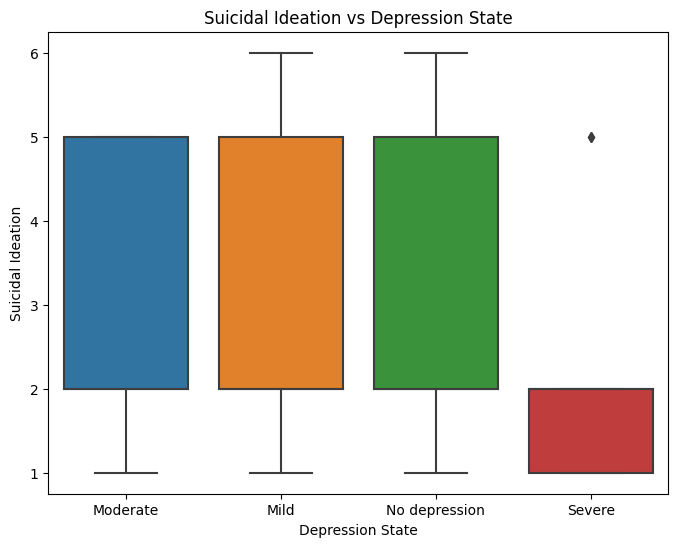

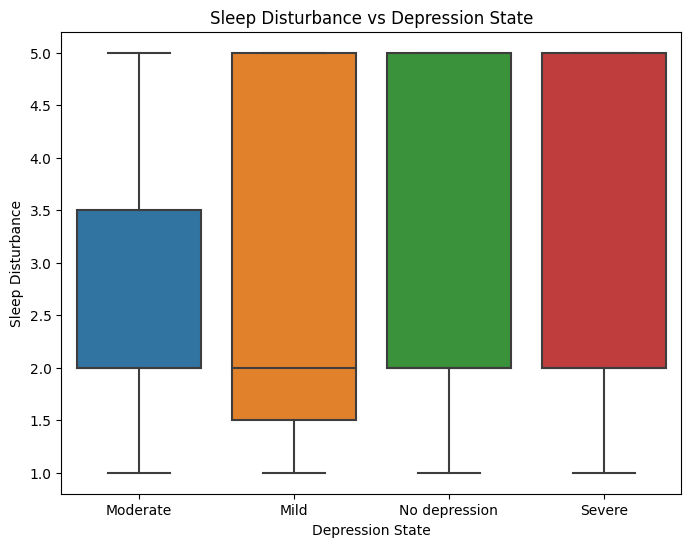

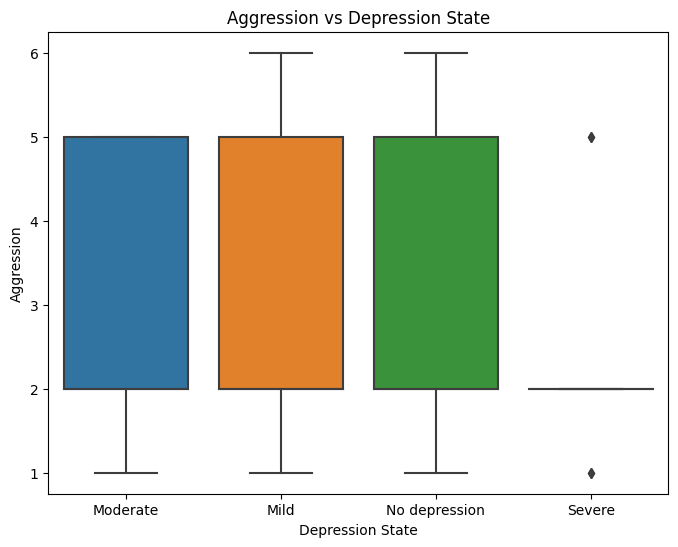

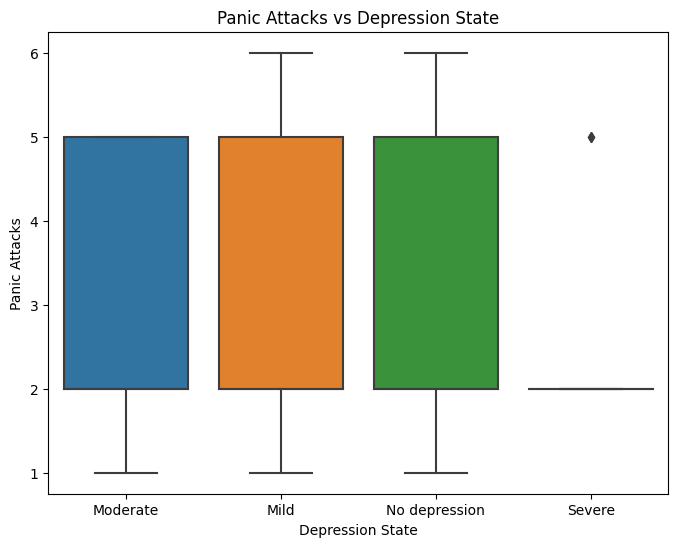

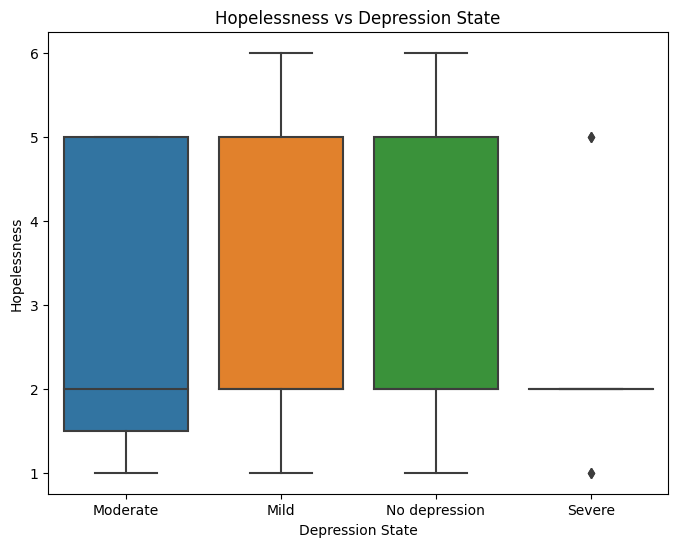

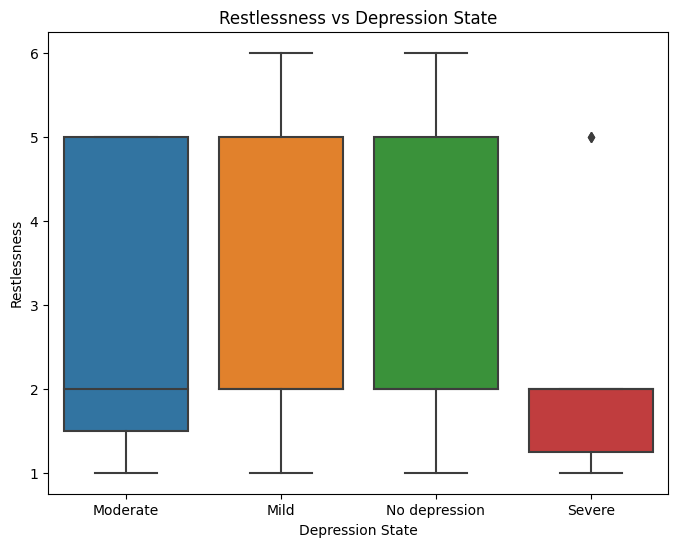

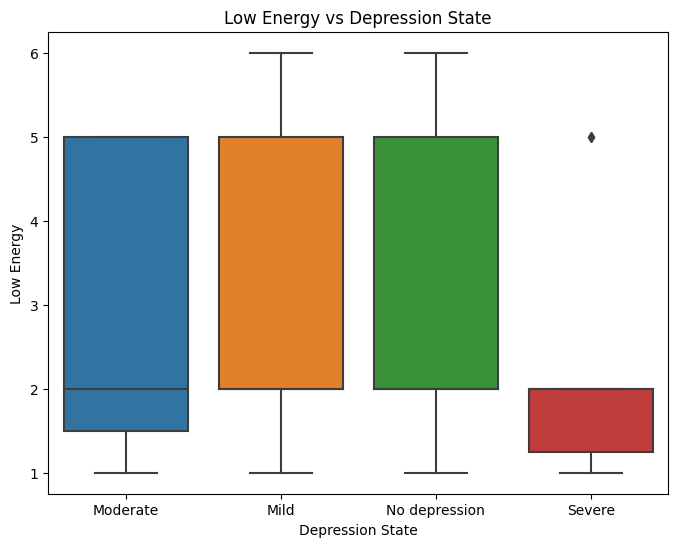

In [18]:
for column in df.columns[:-1]:  # Excluding 'Depression State'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Depression State', y=column, data=df)
    plt.title(f'{column} vs Depression State')
    plt.show()

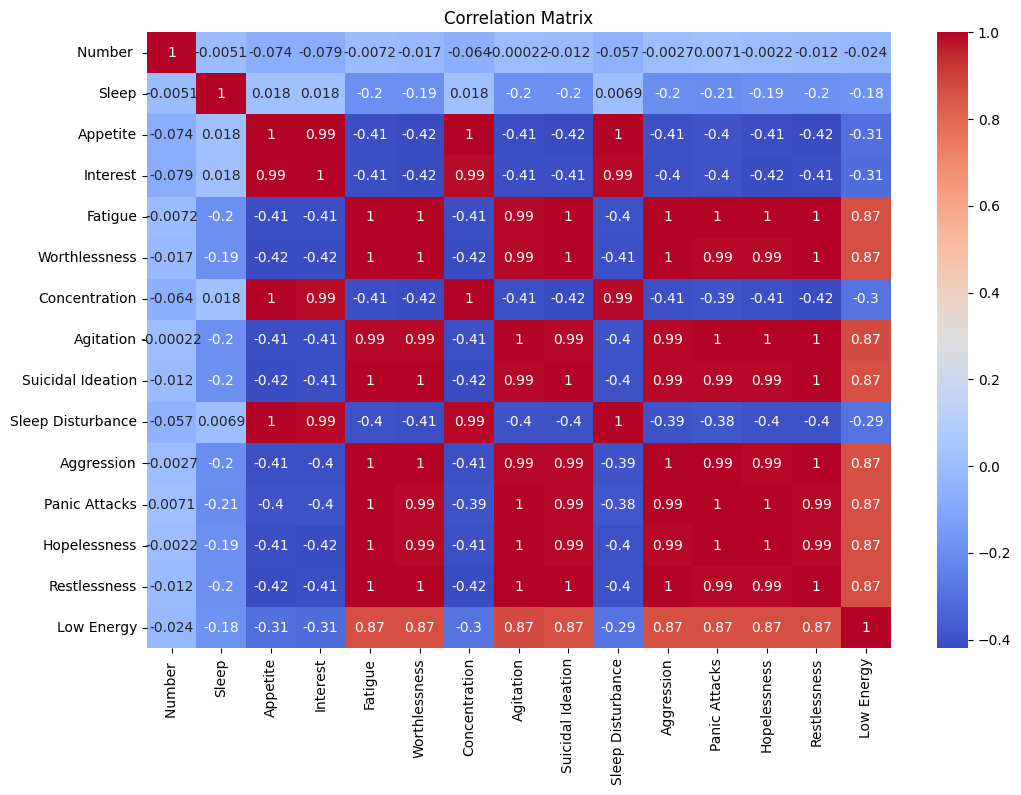

In [19]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[df.columns[:-1]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
sns.pairplot(df, hue='Depression State', palette='viridis')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f303bd8f130> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f303bd8e440> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
g = sns.FacetGrid(df, col='Depression State', col_wrap=4, height=4)
g.map(sns.countplot, 'Sleep')  # Replace 'Sleep' with other column names as needed
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='Depression State', col_wrap=4, height=4)
g.map(sns.countplot, 'Appetite')  # Replace 'Sleep' with other column names as needed
g.add_legend()
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='Depression State', col_wrap=4, height=4)
g.map(sns.countplot, 'Aggression')  # Replace 'Sleep' with other column names as needed
g.add_legend()
plt.show()

In [ ]:
df.columns